In [1]:
from FEM_solver import *
import sympy as sp

In [2]:
y,x = sp.symbols('y x')
f = sp.sin(x)*sp.sin(y)

f.diff(x,2) + f.diff(y,2)

-2*sin(x)*sin(y)

In [2]:
mesh = meshio.read("meshes/SimpleMesh_10by10.msh")

In [3]:
f = lambda x,y: np.sin(x)*np.sin(y)
laplace_f = lambda x,y: -2 * np.sin(x)*np.sin(y)

In [4]:
model = PotentialFlowSolver_FEM(mesh, rhs = laplace_f)

No quad cells found


In [5]:
#for i in range(1,5):
#    model.impose_BC("Dirichlet", i, lambda x,y: x+y)


for i in range(1,5):
    model.impose_BC("Dirichlet", i, f)


In [6]:
model.solve()

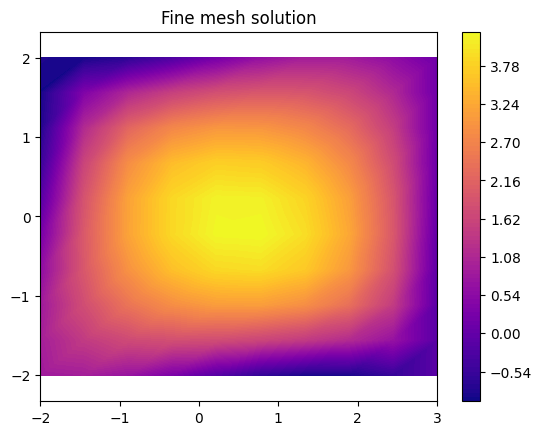

In [7]:
model.plot_solution(figsize= (10,10), title = "Fine mesh solution", show_elements = False)

In [8]:
sol_analytical = np.array([f(*coords) for coords in model.coords])

In [9]:
model.sol = sol_analytical# - model.sol

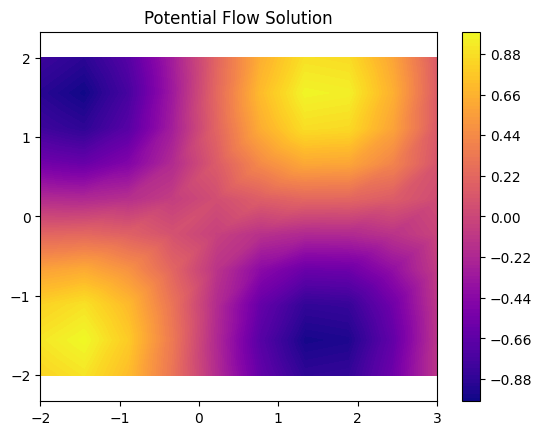

In [10]:
model.plot_solution(show_elements=False)